In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("dataset/smart_city_citizen_activity.csv")

In [5]:
df.head(5)

,Citizen_ID,Age,Gender,Mode_of_Transport,Work_Hours,Shopping_Hours,Entertainment_Hours,Home_Energy_Consumption_kWh,Charging_Station_Usage,Carbon_Footprint_kgCO2,Steps_Walked,Calories_Burned,Sleep_Hours,Social_Media_Hours,Public_Events_Hours
0,1001,56,Female,Walking,5,2,0,5.32,0,44.70,15635,975,9.2,5.8,0.5
1,1002,69,Male,Bicycle,0,2,2,2.19,0,92.39,1671,455,8.1,5.5,1.9
2,1003,46,Male,Bike,0,4,0,4.68,0,78.57,1777,324,4.7,3.8,2.8
3,1004,32,Male,Car,7,2,3,3.42,0,55.46,4022,537,4.9,3.5,0.5
4,1005,60,Male,Walking,3,3,1,2.79,0,98.95,19244,1414,6.6,2.2,0.5


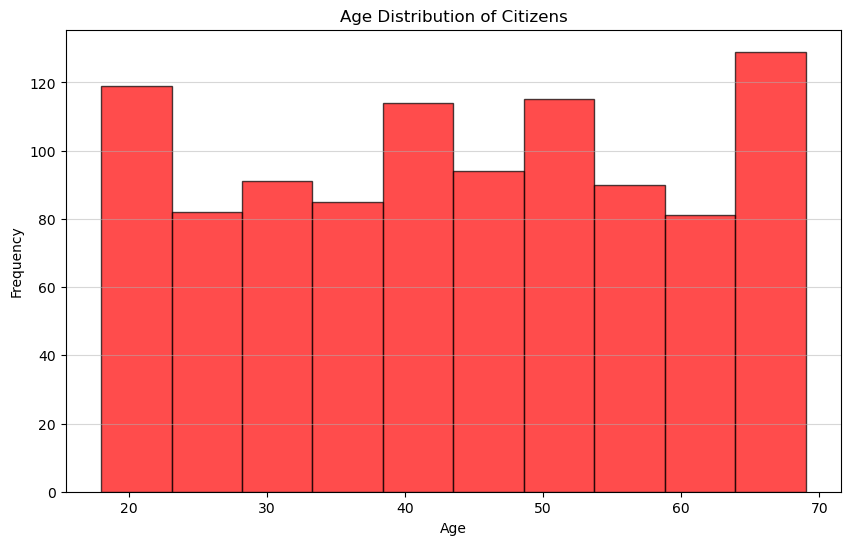

In [15]:
plt.figure(figsize=(10,6))
plt.hist(df["Age"], color="red", edgecolor="black", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Citizens")
plt.grid(axis="y", alpha=0.5)
plt.show()

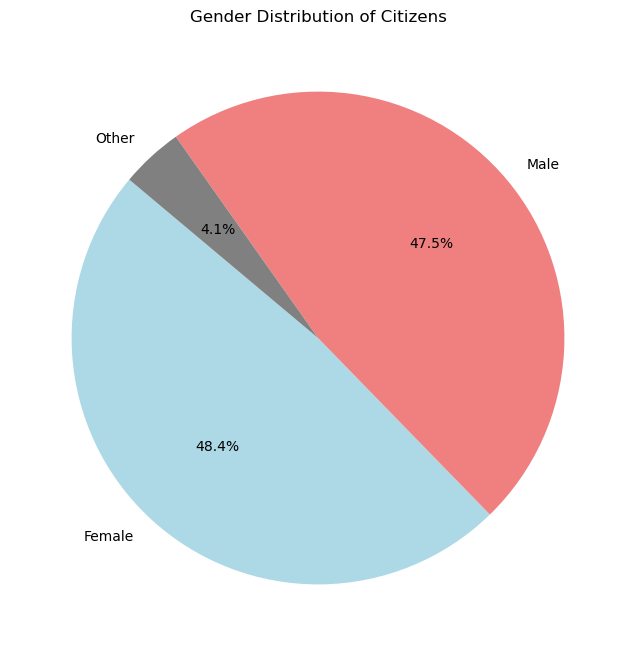

In [17]:
gender_counts = df["Gender"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140, colors=["lightblue", "lightcoral","gray"])
plt.title("Gender Distribution of Citizens")

plt.show()

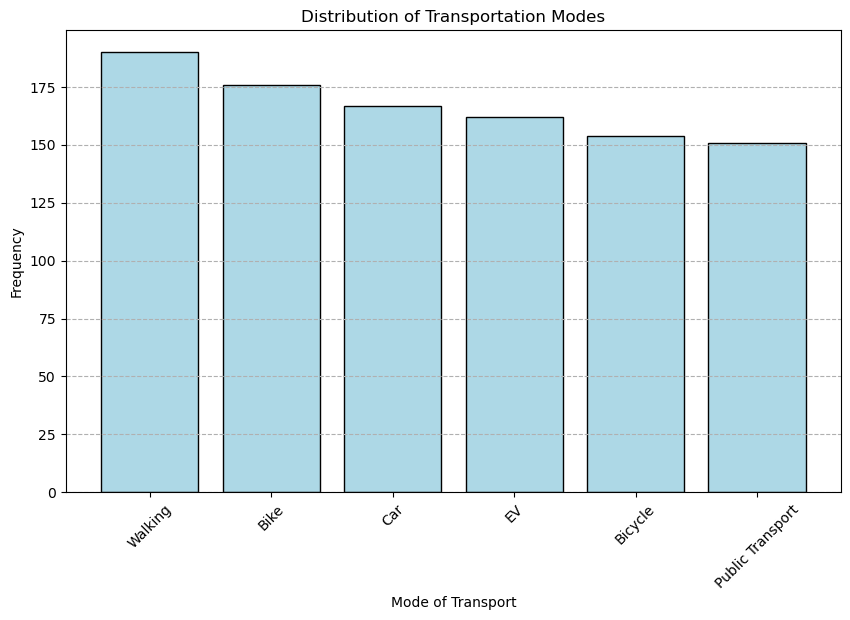

In [19]:
transport_counts = df["Mode_of_Transport"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(transport_counts.index, transport_counts.values, color="lightblue", edgecolor="black")
plt.xlabel("Mode of Transport")
plt.ylabel("Frequency")
plt.title("Distribution of Transportation Modes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--",)

plt.show()

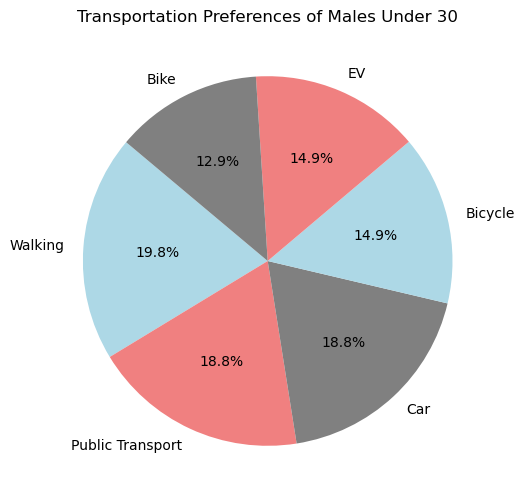

In [21]:
young_male_transport = df[(df["Age"] < 30) & (df["Gender"] == "Male")]["Mode_of_Transport"].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(young_male_transport, labels=young_male_transport.index, autopct="%1.1f%%", startangle=140, colors=["lightblue", "lightcoral","gray"])
plt.title("Transportation Preferences of Males Under 30")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

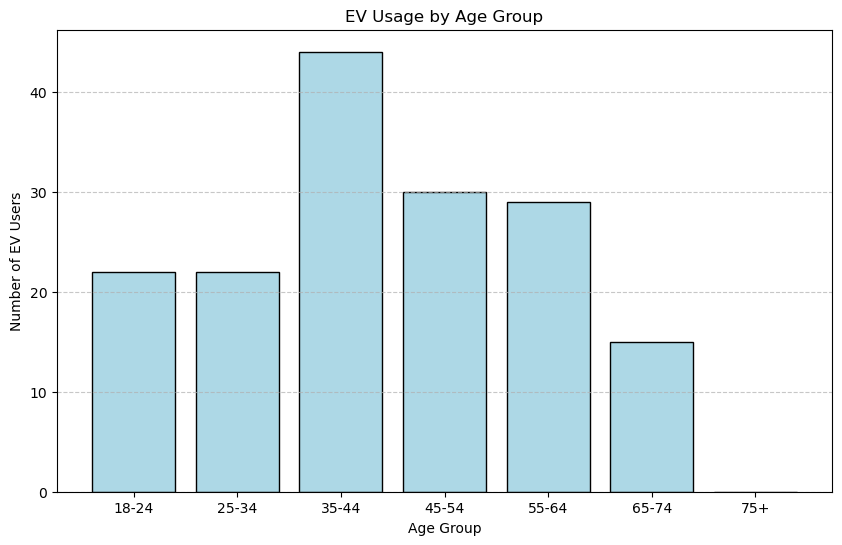

In [23]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 100]
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]

df["Age_Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

ev_age_distribution = df[df["Mode_of_Transport"] == "EV"]["Age_Group"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(ev_age_distribution.index, ev_age_distribution.values, color="lightblue", edgecolor="black")
plt.xlabel("Age Group")
plt.ylabel("Number of EV Users")
plt.title("EV Usage by Age Group")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

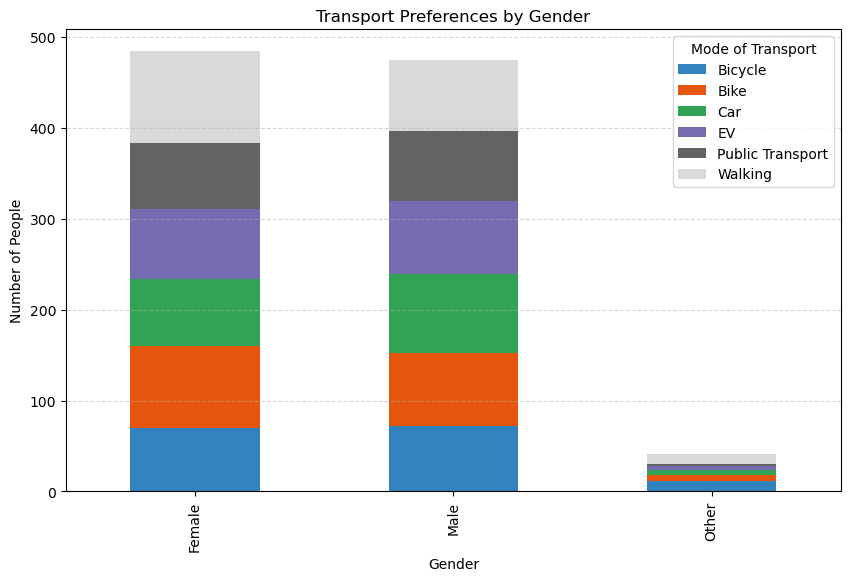

In [34]:
transport_gender = df.groupby(['Gender', 'Mode_of_Transport']).size().unstack()

transport_gender.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.title("Transport Preferences by Gender")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Mode of Transport")
plt.show()


C:\Users\ishau\AppData\Local\Temp\ipykernel_12524\1849995558.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Mode_of_Transport", y="Age", data=df, palette="Set3")


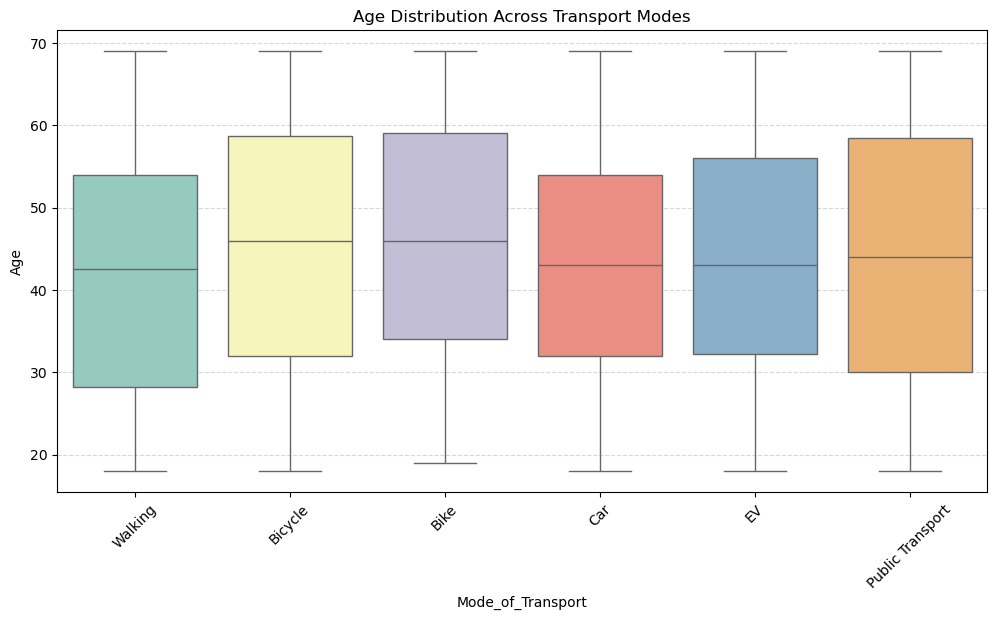

In [37]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x="Mode_of_Transport", y="Age", data=df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Age Distribution Across Transport Modes")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


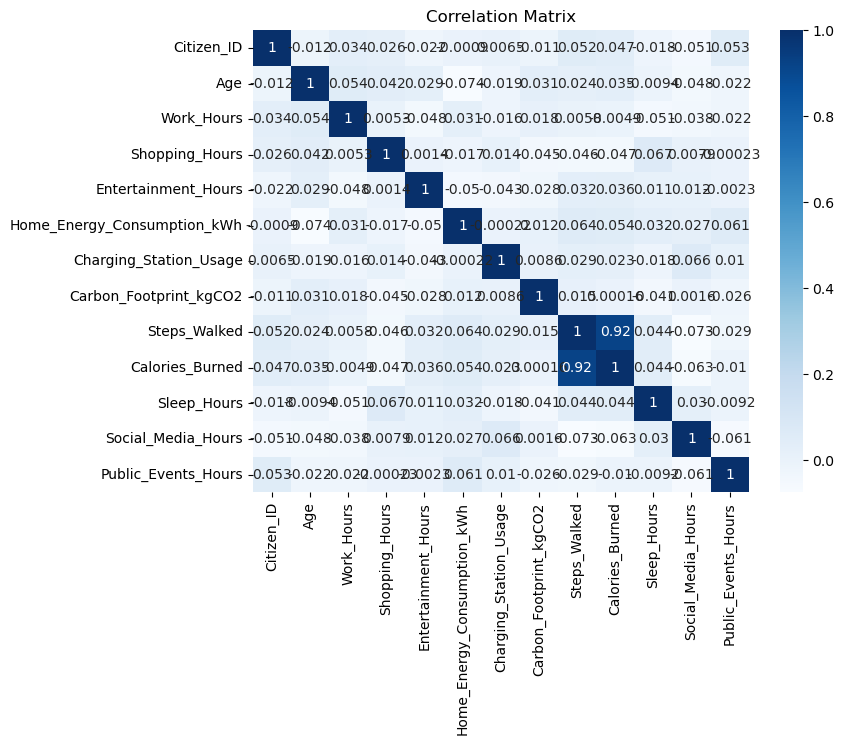

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


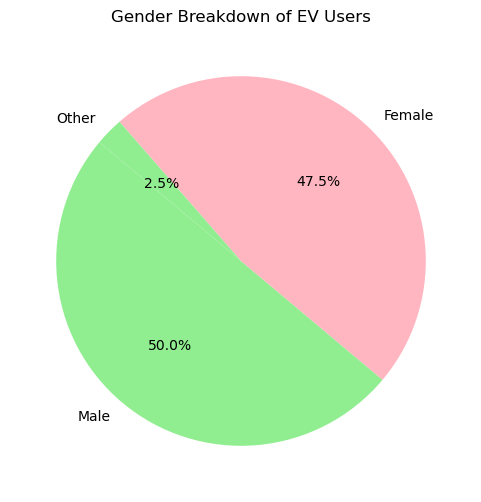

In [45]:
ev_gender = df[df["Mode_of_Transport"] == "EV"]["Gender"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(ev_gender, labels=ev_gender.index, autopct="%1.1f%%", startangle=140, colors=["lightgreen", "lightpink"])
plt.title("Gender Breakdown of EV Users")
plt.show()


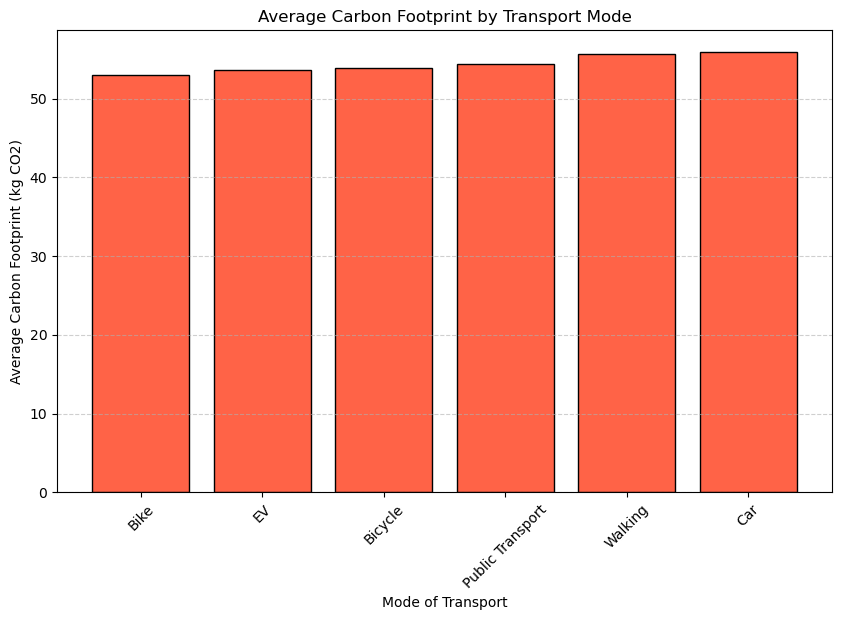

In [47]:
transport_carbon = df.groupby("Mode_of_Transport")["Carbon_Footprint_kgCO2"].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.bar(transport_carbon.index, transport_carbon.values, color="tomato", edgecolor="black")
plt.xlabel("Mode of Transport")
plt.ylabel("Average Carbon Footprint (kg CO2)")
plt.title("Average Carbon Footprint by Transport Mode")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()


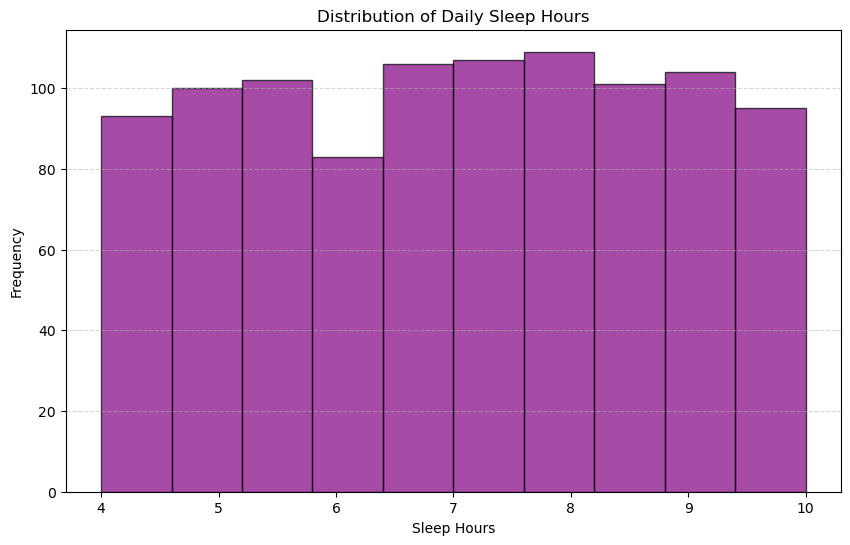

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df["Sleep_Hours"], bins=10, color="purple", edgecolor="black", alpha=0.7)
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Sleep Hours")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


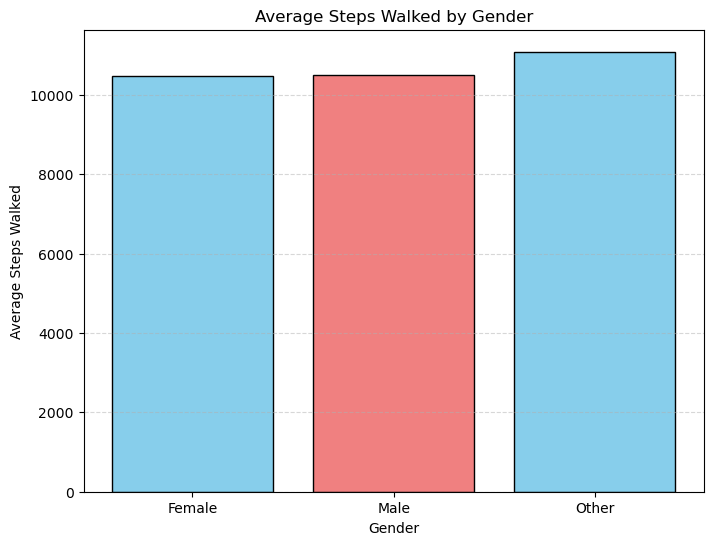

In [51]:
gender_steps = df.groupby("Gender")["Steps_Walked"].mean()

plt.figure(figsize=(8, 6))
plt.bar(gender_steps.index, gender_steps.values, color=["skyblue", "lightcoral"], edgecolor="black")
plt.xlabel("Gender")
plt.ylabel("Average Steps Walked")
plt.title("Average Steps Walked by Gender")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


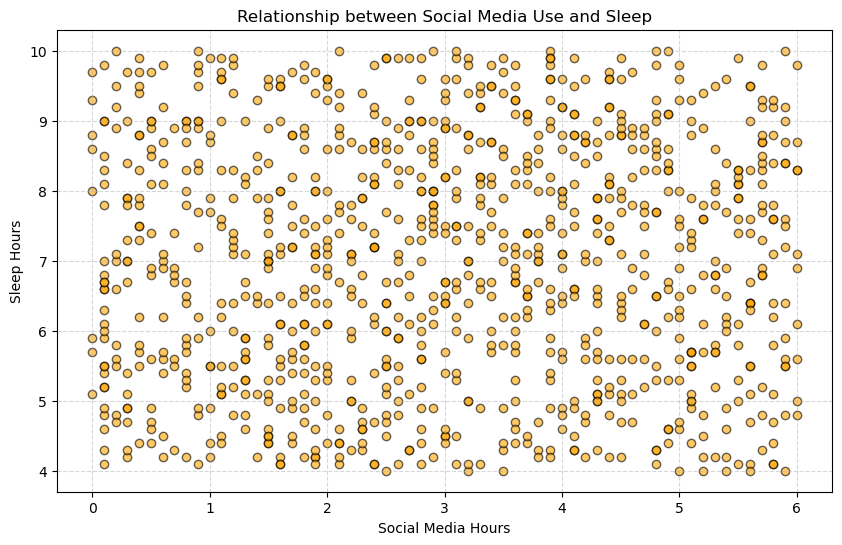

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Social_Media_Hours"], df["Sleep_Hours"], alpha=0.6, color="orange", edgecolor="black")
plt.xlabel("Social Media Hours")
plt.ylabel("Sleep Hours")
plt.title("Relationship between Social Media Use and Sleep")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


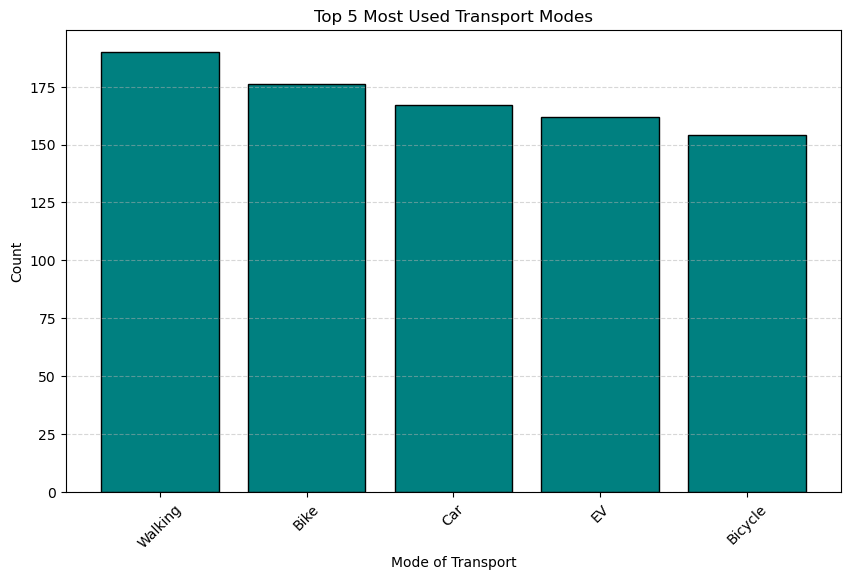

In [55]:
top_transports = df["Mode_of_Transport"].value_counts().head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_transports.index, top_transports.values, color="teal", edgecolor="black")
plt.xlabel("Mode of Transport")
plt.ylabel("Count")
plt.title("Top 5 Most Used Transport Modes")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.show()
